7/11 (Mon)

---

# DeepLidar Pretrained model test

In [4]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn

from utils.data import load_image, show_image
from DeepLiDAR.submodels.depthCompleNew import depthCompletionNew

### 1. Load pretrained model

In [2]:
pretrained_model = torch.load("/home/matsuura/Development/waseda/m1/lecture_spring_2022/cgo/group_work/depth_completion_KITTI.tar")

In [3]:
model = depthCompletionNew(1)
model = nn.DataParallel(model, device_ids=[0])
model.load_state_dict(pretrained_model["state_dict"])
model.module.normal.state_dict

<bound method Module.state_dict of depthCompletionNew2(
  (convS): ResBlock(
    (conv1): Sequential(
      (0): Sequential(
        (0): Conv2d(2, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): ReLU(inplace=True)
    )
    (conv2): Sequential(
      (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (ds): Sequential(
      (0): Conv2d(2, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (relu): ReLU(inplace=True)
  )
  (convS0): ResBlock(
    (conv1): Sequential(
      (0): Sequential(
        (0): Conv2d(32, 99, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(99, eps=1

### 2. Prediction

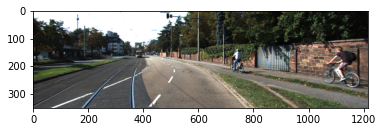

<Figure size 432x288 with 0 Axes>

In [14]:
X = load_image("/home/matsuura/Development/waseda/m1/lecture_spring_2022/cgo/group_work/dataset/depth_selection/val_selection_cropped/image/2011_09_26_drive_0002_sync_image_0000000005_image_02.png")
show_image(X)

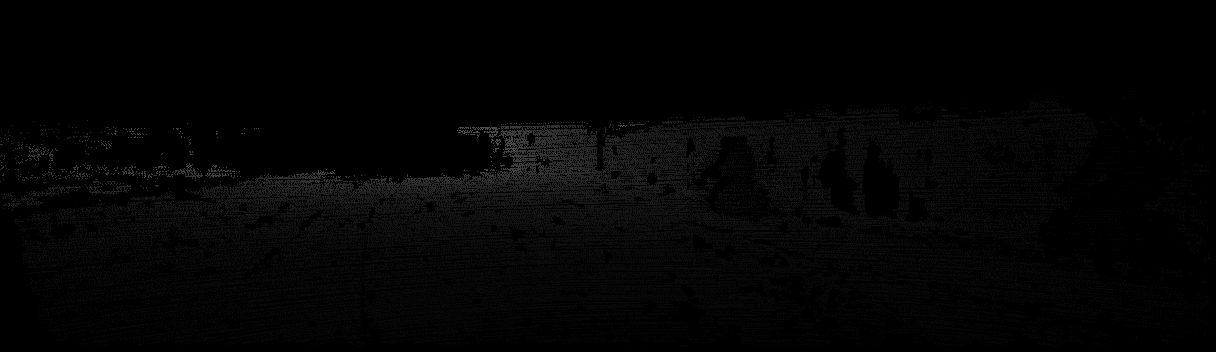

In [15]:
Y = load_image("/home/matsuura/Development/waseda/m1/lecture_spring_2022/cgo/group_work/dataset/depth_selection/val_selection_cropped/groundtruth_depth/2011_09_26_drive_0002_sync_groundtruth_depth_0000000005_image_02.png")
Y